In [2]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [3]:
deliveries= pd.read_csv('../data/parsed/deliveries_clean.csv')

In [4]:
deliveries.head()

,id,route_id,state,_status,items,total_size,pickupLat,pickupLng,deliveryLat,deliveryLng,...,delivery_arrival_dt,delivery_effective_dt,cost,final_price,distance,shipper_id,distance_charged,distance_route,total_package_price,vehicle_capacity
0,t-amabrt-1743660,r-shiinc-1248026,7,completed,"[{'id':'SFYBR004818881','qty':1,'name':'CAIXA'...",2,-19.9618,-44.0285,-19.4522,-44.2543,...,2022-05-02 15:49:13,2022-05-02 15:52:13,4.47,5.76,72.2,247379.0,0.3,0.3,19.72,2.0
1,t-amabrt-1743661,r-shiinc-1248060,7,completed,"[{'id':'SFYBR004812869','qty':1,'name':'CAIXA'...",2,-19.9618,-44.0285,-19.8932,-43.9991,...,2022-05-02 17:14:51,2022-05-02 17:16:29,2.99,6.87,12.2,222936.0,0.2,0.2,30.04,2.0
2,t-amabrt-1743662,r-shiinc-1248042,7,completed,"[{'id':'SFYBR004809553','qty':1,'name':'CAIXA'...",2,-19.9618,-44.0285,-19.8820,-44.0004,...,2022-05-02 19:13:07,2022-05-02 19:14:19,2.99,4.87,13.3,348598.0,0.4,0.4,39.60,2.0
3,t-amabrt-1743663,r-shiinc-1248032,7,completed,"[{'id':'SFYBR004808848','qty':1,'name':'CAIXA'...",2,-19.9618,-44.0285,-19.7904,-43.9844,...,2022-05-02 20:52:14,2022-05-02 20:56:31,2.99,4.80,27.7,393179.0,0.9,0.9,30.63,2.0
4,t-amabrt-1743664,r-shiinc-1248067,7,completed,"[{'id':'SFYBR004808369','qty':1,'name':'CAIXA'...",2,-19.9618,-44.0285,-19.8798,-43.9029,...,2022-05-02 17:21:59,2022-05-02 17:27:24,2.99,5.94,18.9,269174.0,0.0,0.0,4.90,2.0


In [5]:
columns_to_change=[
    'pickup_dt',
    'max_pickup_dt',
    'pickup_arrival_dt',
    'pickup_effective_dt',
    'delivery_dt',
    'max_delivery_dt',
    'delivery_arrival_dt',
    'delivery_effective_dt'
]

for i in columns_to_change:
    deliveries[i]=pd.to_datetime(deliveries[i])

In [6]:
deliveries['day']=deliveries.delivery_effective_dt.apply(lambda x: x.strftime('%A'))
# deliveries.groupby(pd.Grouper(freq='h',key='delivery_effective_dt')).sum()

In [14]:
deliveries.sort_values('day',inplace=True)

array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)

In [26]:
def generate_pivot_table_day(key,df):
    columns_order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
    df_reindex=df.set_index(key)
    delivery_reindex=df_reindex.groupby([df_reindex.index.hour,'day']).count().reset_index()
    t_pivot= pd.pivot_table(delivery_reindex, index=[key], columns='day',values="id")
    t_pivot=t_pivot.reindex(columns_order,axis=1)
    t_pivot.sort_index(level=0,ascending=False,inplace=True)
    return t_pivot


In [27]:
t_delivery_arrival_dt=generate_pivot_table_day('delivery_arrival_dt',deliveries)
t_pickup_effective_dt=generate_pivot_table_day('pickup_effective_dt',deliveries)

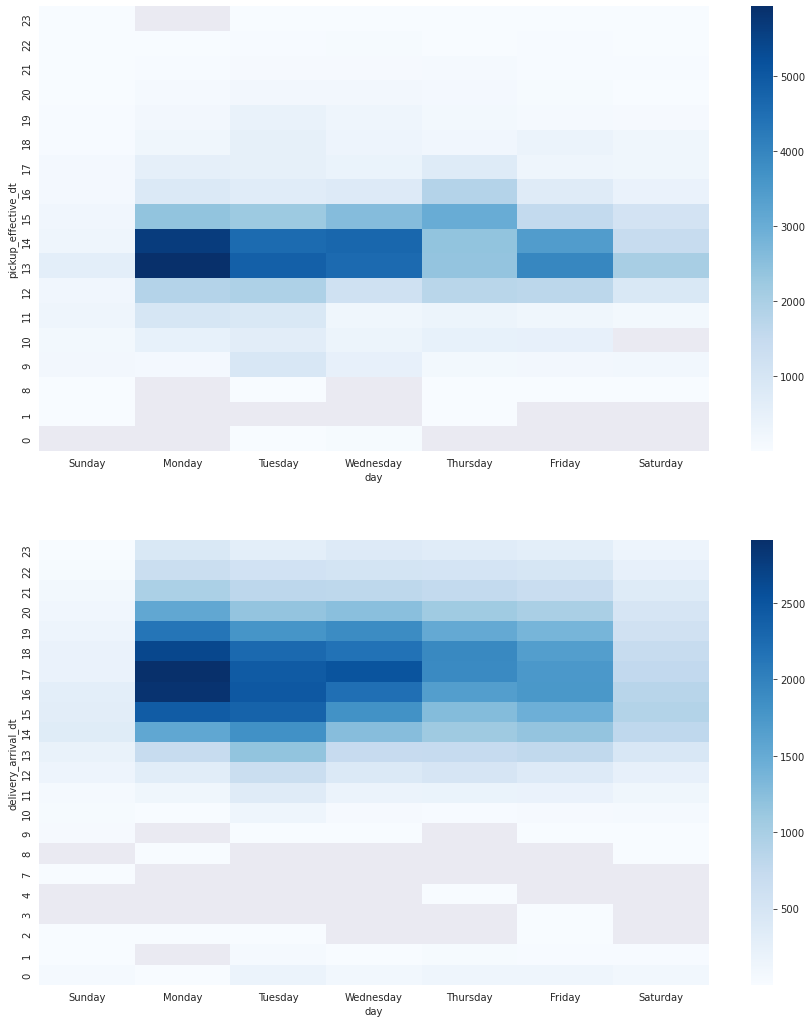

In [30]:
sbn.set_style('darkgrid')
fig,axs= plt.subplots(2,1,figsize=(15,18))
ax1=sbn.heatmap(t_pickup_effective_dt,ax=axs[0],cmap="Blues")
ax2=sbn.heatmap(t_delivery_arrival_dt,ax=axs[1],cmap="Blues")

In [33]:
deliveries.head()

,id,route_id,state,_status,items,total_size,pickupLat,pickupLng,deliveryLat,deliveryLng,...,delivery_effective_dt,cost,final_price,distance,shipper_id,distance_charged,distance_route,total_package_price,vehicle_capacity,day
26629,t-amabrt-1808413,r-shiinc-1281809,7,completed,"[{'id':'SFYBR005048682','qty':1,'name':'CAIXA'...",2,-19.9618,-44.0285,-19.8732,-43.9782,...,2022-05-20 17:46:12,2.99,4.87,14.1,283804.0,0.8,0.8,56.21,2.0,Friday
35694,t-amabrz-1564895,r-shiinc-1256287,7,completed,"[{'id':'AM1001540726YY','qty':1,'name':'CAIXA'...",2,-19.9618,-44.0285,-19.9903,-44.4301,...,2022-05-06 22:40:56,8.51,5.96,49.9,78816.0,0.8,0.8,78.36,2.0,Friday
35695,t-amabrz-1564896,r-shiinc-1256350,7,completed,"[{'id':'AM1001540709YY','qty':1,'name':'CAIXA'...",2,-19.9618,-44.0285,-19.8562,-43.9570,...,2022-05-06 17:39:15,2.99,4.87,16.9,69748.0,0.1,0.1,74.33,2.0,Friday
35696,t-amabrz-1564898,r-shiinc-1256389,7,completed,"[{'id':'AM1001540713YY','qty':1,'name':'CAIXA'...",2,-19.9618,-44.0285,-19.9417,-43.9453,...,2022-05-06 18:03:22,2.60,4.87,11.4,144739.0,0.2,0.2,45.20,2.0,Friday
35697,t-amabrz-1564899,r-shiinc-1256350,7,completed,"[{'id':'AM1001540727YY','qty':1,'name':'CAIXA'...",2,-19.9618,-44.0285,-19.8651,-43.9546,...,2022-05-06 17:06:41,2.99,4.97,16.3,69748.0,0.6,0.6,96.99,2.0,Friday


In [62]:
days=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

In [51]:
shipper_route_days=deliveries.groupby(['day','shipper_id']).agg({'route_id':lambda x: x.unique().size})

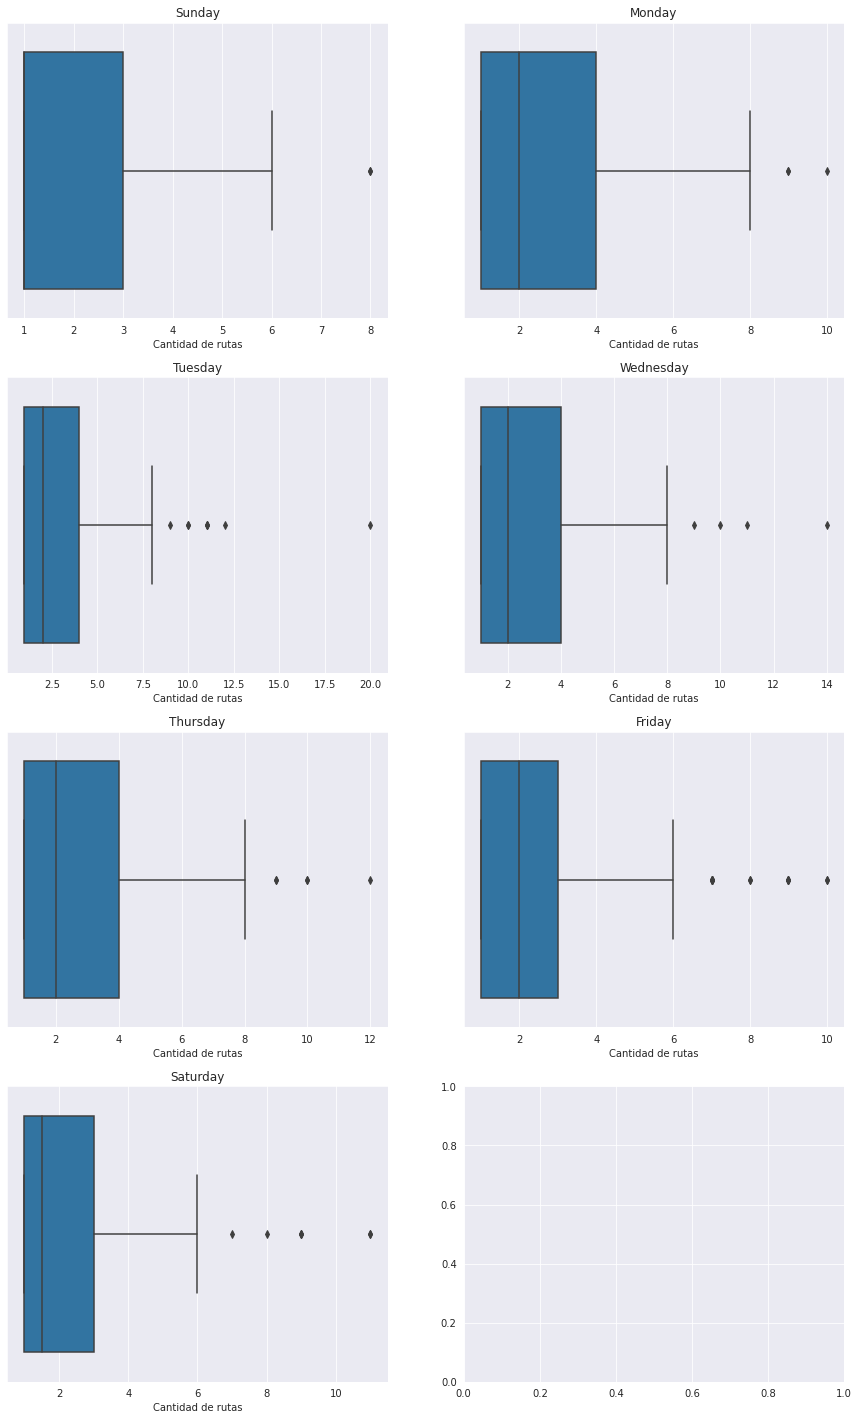

In [72]:
fig,axs= plt.subplots(4,2,figsize=(15,25))
fila=0
col=0
for indice,i in enumerate(days):
    col=indice%2
    df_dia=shipper_route_days.xs(i)
    ax=sbn.boxplot(x=df_dia["route_id"],ax=axs[fila,col])
    ax.title.set_text(i)
    ax.set_xlabel('Cantidad de rutas')
    fila= fila if col==0 else fila+1;